In [1]:
from thil_utils import *
os.getcwd()

Using cuda device
Figure directory exists.
Model saving directory exists.


'/hpc/home/srs108/thilafushi'

In [2]:
p = create_dataset('kappa_data.pkl',
                   apply_transforms=True)


In [3]:
n = create_dataset_n(img_dir = '/hpc/home/srs108/thilafushi/none_sorted_images/negative',
                    apply_transforms=True)

In [4]:
# b = torch.utils.data.ConcatDataset([p, n])
# dl = DataLoader(b, batch_size=9, shuffle=True)

In [ ]:
class PositiveOnly(Dataset):
    def __init__(self, p_pkl, transform=None):
        self.p_pkl = p_pkl
        self.transform = transform
        
        with open(p_pkl, "rb") as fp:
            self.p_pkl = pkl.load(fp)
        
    def __len__(self):
        return len(self.p_pkl)
    
    def __getitem__(self, idx):
        sample = self.p_pkl[idx]
#         print(sample)
        if self.transform:
            sample = self.transform(sample)
        return sample
    
    
class Randomize(object):
    """Randomize image orientation including rotations by integer multiples of
       90 deg, (horizontal) mirroring, and (vertical) flipping."""

    def __call__(self, sample):
        """
        :param sample: sample to be randomized
        :return: randomized sample
        """
        imgdata = sample['img']
        fptdata = sample['fpt']

        # mirror horizontally
        mirror = np.random.randint(0, 2)
        if mirror:
            imgdata = np.flip(imgdata, 2)
            fptdata = np.flip(fptdata, 1)
        # flip vertically
        flip = np.random.randint(0, 2)
        if flip:
            imgdata = np.flip(imgdata, 1)
            fptdata = np.flip(fptdata, 0)
        # rotate by [0,1,2,3]*90 deg
        rot = np.random.randint(0, 4)
        imgdata = np.rot90(imgdata, rot, axes=(1,2))
        fptdata = np.rot90(fptdata, rot, axes=(0,1))

        return {'idx': sample['idx'],
                'img': imgdata.copy(),
                'fpt': fptdata.copy(),
                'imgfile': sample['imgfile']}

def create_dataset(*args, apply_transforms=True, **kwargs):
    """Create a dataset; uses same input parameters as PowerPlantDataset.
    :param apply_transforms: if `True`, apply available transformations
    :return: data set"""
    if apply_transforms:
        data_transforms = transforms.Compose([
            Randomize(),
#             ToTensor(),
        ])
    else:
        data_transforms = None

    data = PositiveOnly(*args, **kwargs, transform=data_transforms)
    return data

In [25]:
sample= create_dataset('kappa_data.pkl', apply_transforms=True)

[  0   1   4   5   6   7   8  10  12  13  14  15  18  19  20  21  22  23
  24  25  26  27  28  29  31  32  33  34  35  36  37  38  39  40  42  44
  46  48  49  50  51  52  54  55  56  57  59  60  61  63  65  66  69  70
  71  72  75  77  78  80  81  82  83  84  85  87  88  89  90  91  92  93
  94  95  96  97 100 101 102 108 112 113 114 115 120 121 125 129 130 131
 132 133 135 136 137 138 139 140 144 145 146 148 149 151 153 154 155 156
 158 159 160 161 163 164 166 167 169 177 178 181 184 185 186 187 188 189
 190 191 192 193 194 195 196 197 198 199 201 202 203 204 205 206 207 208
 209 210 212 213 215 217 218 220 221 225 227 228 229 230 231 232 235 236
 238 240 242 243 246 249 250 251 253 254 256 258 259 261 263 265 266 267
 269 270 271 274 275 276 277 279 282 285 286 287 288 289 291 293 294 295
 296 297 298 299 300 302 303 304 305 306 307 308 309 310 311 313 314 317
 318 319 320 321 322 323 328 329 330 331 334 335 336 339 340 341 342 343
 345 346 347 348 350 353 354 355 356 358 364 365 36

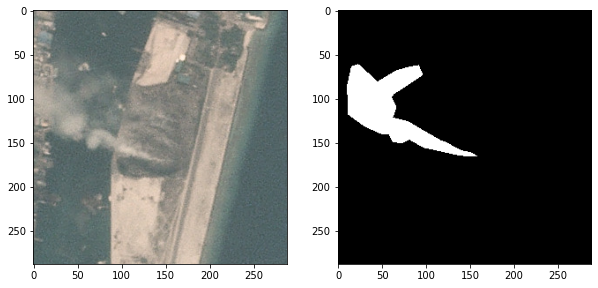

[  1   2   3   5   7   8   9  10  11  12  13  15  16  17  18  19  20  25
  30  32  34  35  37  39  40  41  42  43  45  47  49  53  56  57  58  59
  60  62  64  66  67  68  71  72  73  74  76  78  79  80  82  86  88  91
  93  94  95  96  97  98  99 100 101 103 104 105 106 107 108 109 110 111
 112 116 117 118 119 121 122 123 124 125 126 127 128 129 130 132 133 134
 135 136 138 140 141 142 143 146 147 148 150 152 156 157 161 162 163 164
 165 168 170 171 172 173 174 175 176 178 179 180 182 183 185 188 191 193
 196 197 198 199 200 201 203 208 210 211 212 213 214 215 216 219 222 223
 224 226 227 228 229 230 231 232 233 234 235 236 237 239 240 241 244 245
 246 247 248 250 252 253 254 255 256 257 258 259 260 261 262 263 264 268
 269 270 271 272 273 276 278 280 281 283 284 286 287 289 290 292 296 297
 298 300 301 304 306 307 308 309 311 312 313 314 315 316 317 319 324 325
 326 327 330 332 333 334 337 338 341 342 343 344 345 346 348 349 351 352
 355 357 359 360 361 362 363 365 366 368 369 370 37

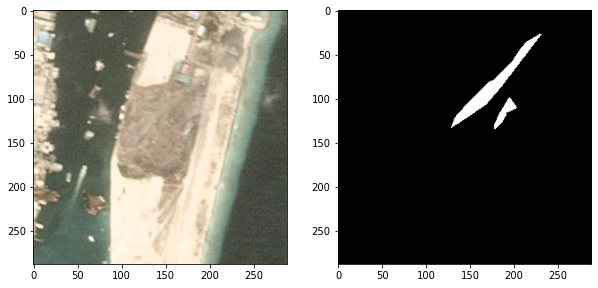

[  0   2   3   4   6   9  11  14  16  17  21  22  23  24  26  27  28  29
  30  31  33  36  38  41  43  44  45  46  47  48  50  51  52  53  54  55
  58  61  62  63  64  65  67  68  69  70  73  74  75  76  77  79  81  83
  84  85  86  87  89  90  92  98  99 102 103 104 105 106 107 109 110 111
 113 114 115 116 117 118 119 120 122 123 124 126 127 128 131 134 137 139
 141 142 143 144 145 147 149 150 151 152 153 154 155 157 158 159 160 162
 165 166 167 168 169 170 171 172 173 174 175 176 177 179 180 181 182 183
 184 186 187 189 190 192 194 195 200 202 204 205 206 207 209 211 214 216
 217 218 219 220 221 222 223 224 225 226 233 234 237 238 239 241 242 243
 244 245 247 248 249 251 252 255 257 260 262 264 265 266 267 268 272 273
 274 275 277 278 279 280 281 282 283 284 285 288 290 291 292 293 294 295
 299 301 302 303 305 310 312 315 316 318 320 321 322 323 324 325 326 327
 328 329 331 332 333 335 336 337 338 339 340 344 347 349 350 351 352 353
 354 356 357 358 359 360 361 362 363 364 366 367 36

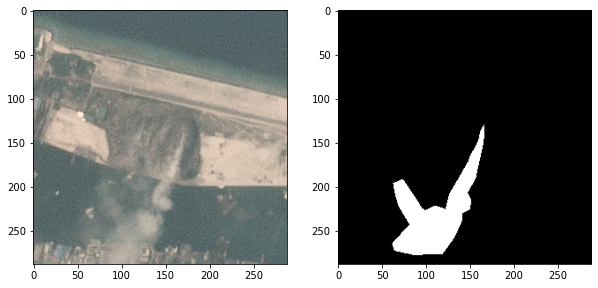

In [7]:
import matplotlib.pyplot as plt
import numpy as np

kf  = KFold(n_splits=3, shuffle = True)
data_train = torch.utils.data.ConcatDataset([p, n])

for fold, (train_index, test_index) in enumerate(kf.split(data_train)):
    print(train_index)
    train_set = torch.utils.data.Subset(data_train, train_index)
    test_set = torch.utils.data.Subset(data_train, test_index)
    
    sample = train_set[0]
    image = np.moveaxis(sample['img'].numpy(), 0,2)
    mask = sample['fpt'].numpy()
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.imshow(image, cmap='gray')
    ax2.imshow(mask, cmap='gray')
    plt.show()
